In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
classes=data['class'].value_counts()

In [5]:
classes


class
e    4208
p    3916
Name: count, dtype: int64

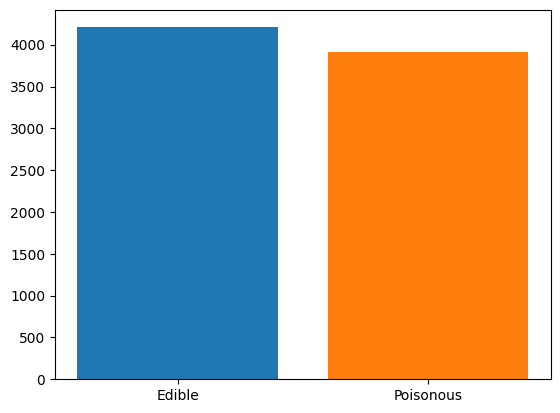

In [7]:
plt.bar('Edible',classes['e'])
plt.bar('Poisonous',classes['p'])
plt.show()

In [8]:
x=data.loc[:,['cap-shape','cap-color','ring-number','ring-type']]

In [9]:
y=data.loc[:,'class']

In [10]:
x

,cap-shape,cap-color,ring-number,ring-type
0,x,n,o,p
1,x,y,o,p
2,b,w,o,p
3,x,w,o,p
4,x,g,o,e
...,...,...,...,...
8119,k,n,o,p
8120,x,n,o,p
8121,f,n,o,p
8122,k,n,o,e


In [11]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [13]:
encoder=LabelEncoder()
for i in x.columns:
    x[i]=encoder.fit_transform(x[i])

In [16]:
y=encoder.fit_transform(y)

In [17]:
x

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [18]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=12)

In [20]:
logistic_classsifier_model=LogisticRegression()
ridge_classifier_model=RidgeClassifier()

In [21]:
decision_tree_model=DecisionTreeClassifier()

In [23]:
naive_bayes_model=GaussianNB()
neural_network_model=MLPClassifier()

In [24]:
logistic_classsifier_model.fit(x_train,y_train)
ridge_classifier_model.fit(x_train,y_train)
decision_tree_model.fit(x_train,y_train)
naive_bayes_model.fit(x_train,y_train)
neural_network_model.fit(x_train,y_train)

C:\Users\serif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [29]:
logistic_pred=logistic_classsifier_model.predict(x_test)
ridge_pred=ridge_classifier_model.predict(x_test)
tree_pred=decision_tree_model.predict(x_test)
naive_bayes_pred=naive_bayes_model.predict(x_test)
neural_network_pred=neural_network_model.predict(x_test)

In [31]:
logistic_report=classification_report(y_test,logistic_pred)
ridge_report=classification_report(y_test,ridge_pred)
tree_report=classification_report(y_test,tree_pred)
naive_bayes_report=classification_report(y_test,naive_bayes_pred)
neural_network_report=classification_report(y_test,neural_network_pred)


In [34]:
print('***** Logistic regression******')
print(logistic_report)

***** Logistic regression******
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1245
           1       0.79      0.79      0.79      1193

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438



In [35]:
print('*****    Ridge Regresssion****')
print(ridge_report)

*****    Ridge Regresssion****
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1245
           1       0.79      0.79      0.79      1193

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438



In [36]:
print('***** decision tree ****')
print(tree_report)

***** decision tree ****
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1245
           1       0.89      0.92      0.90      1193

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438



In [37]:
print('***** naive bayes ****')
print(naive_bayes_report)

***** naive bayes ****
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1245
           1       0.79      0.80      0.79      1193

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438



In [38]:
print('***** neural network ****')
print(neural_network_report)

***** neural network ****
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1245
           1       0.87      0.86      0.86      1193

    accuracy                           0.87      2438
   macro avg       0.87      0.87      0.87      2438
weighted avg       0.87      0.87      0.87      2438



In [39]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
forest_pred=random_forest_model.predict(x_test)
forest_report=classification_report(y_test,forest_pred)

In [44]:
print(forest_report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1245
           1       0.89      0.92      0.90      1193

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438

